In [1]:
#|default_exp masking

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
#|export
from scip_workflows.common import *

In [6]:
from skimage import img_as_float32

In [7]:
#|export
import zarr
from scip.masking import threshold, remove_regions_touching_border, get_bounding_box

In [8]:
#|export
def plot_scip_segmentation(r, bbox_channel_index=0, smooth=1, border=True):
    z = zarr.open(r.meta_path)
    pixels = z[r.meta_zarr_idx].reshape(z.attrs["shape"][r.meta_zarr_idx])
    pixels = numpy.clip(pixels, a_min=0, a_max=4096)

    m = threshold.get_mask(dict(pixels=pixels), main_channel=bbox_channel_index, smooth=smooth)
    m = get_bounding_box(m)
    if border:
        m = remove_regions_touching_border(m, bbox_channel_index=bbox_channel_index)

    fig, axes = plt.subplots(2, len(pixels), dpi=150, squeeze=False)
    for i, (a, p) in enumerate(zip(m["mask"], pixels)):
        axes[0, i].imshow(a)
        axes[0, i].set_axis_off()
        axes[1, i].imshow(p)
        axes[1, i].set_axis_off()

    return m

In [9]:
zarr_path, zarr_idx = ('/data/gent/vo/000/gvo00070/vsc42015/datasets/weizmann/EhV/v2/images/Ctrl_T7_R1_22.zarr', 0)
z = zarr.open(zarr_path)

In [10]:
r = pandas.Series({"meta_path": zarr_path, "meta_zarr_idx": zarr_idx})

In [11]:
pixels = z[zarr_idx].reshape(z.attrs["shape"][zarr_idx])

In [12]:
pixels = numpy.clip(pixels, a_min=0, a_max=4096).astype(float)
pixels = img_as_float32(pixels)

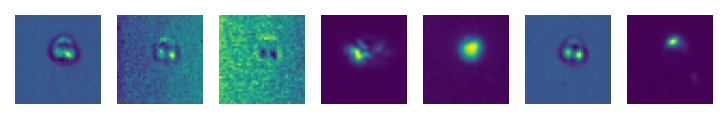

In [13]:
fig, axes = plt.subplots(1, len(pixels), dpi=150, squeeze=False)
axes = axes.ravel()
for p, ax in zip(pixels, axes):
    ax.imshow(p)
    ax.set_axis_off()

In [11]:
from skimage.morphology import closing, remove_small_holes, remove_small_objects, label, disk, binary_closing, binary_dilation
from skimage.filters import sobel, gaussian, threshold_otsu, threshold_mean, threshold_isodata

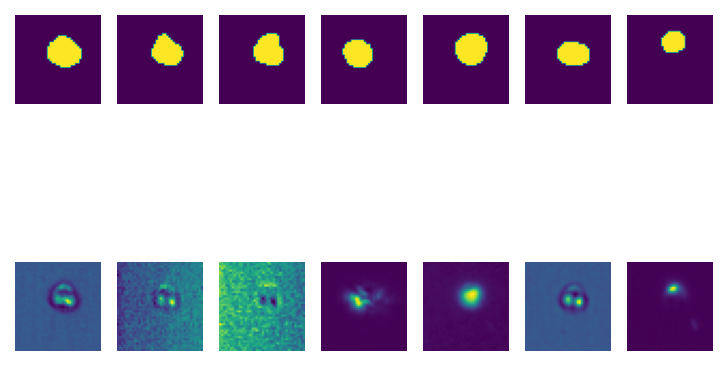

In [14]:
m = plot_scip_segmentation(r, 4)

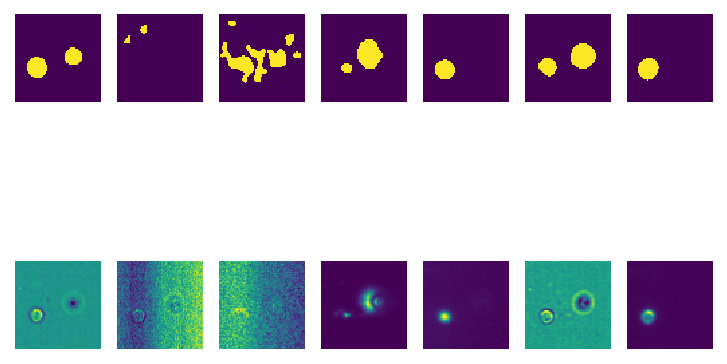

In [42]:
m = plot_scip_segmentation(r, 4)

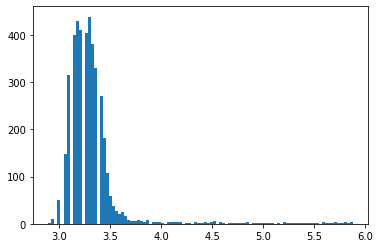

In [190]:
_ = plt.hist(numpy.log(pixels[4].ravel()), bins=100)

In [193]:
t = threshold_otsu(numpy.log(pixels[4]))

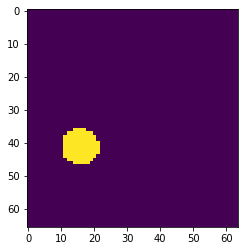

In [194]:
plt.imshow(((numpy.e**t) < pixels[4]))

In [196]:
t = threshold_otsu(pixels[4])

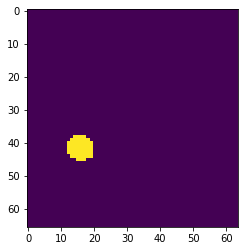

In [197]:
plt.imshow(t < pixels[4])

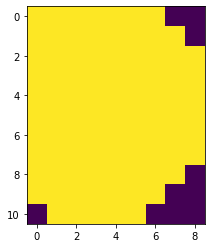

In [158]:
bbox = m["bbox"]
x = pixels[4, bbox[0]:bbox[2], bbox[1]:bbox[3]]

x = gaussian(x, sigma=1)
# x = sobel(x)
# x = closing(x, selem=disk(2))
x = threshold_mean(numpy.log(x)) < numpy.log(x)
x = binary_dilation(x, disk(2))
# x = binary_closing(x, disk(1))
# x = remove_small_holes(x, area_threshold=5)
# x = remove_small_objects(x, min_size=5)
x = label(x)
plt.imshow(x)

In [59]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.morphology import white_tophat, disk

In [60]:
pixels2 = pixels.copy()

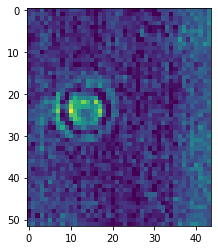

In [61]:
plt.imshow(white_tophat(pixels[1], disk(10)))

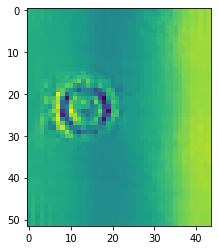

In [82]:
sigma = estimate_sigma(pixels[1])
pixels2[1] = denoise_nl_means(pixels[1], patch_size=10, patch_distance=5, sigma=sigma, h=sigma)
plt.imshow(pixels2[1])

In [83]:
from scip.segmentation import util, threshold

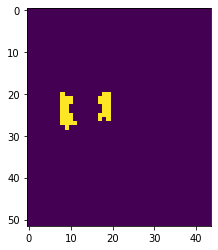

In [84]:
m = threshold.get_mask(dict(pixels=pixels), main=True, main_channel=0)
m = util.get_bounding_box(m, bbox_channel=0)
m = threshold.get_mask(m, main=False, main_channel=0)
plt.imshow(m["mask"][1])

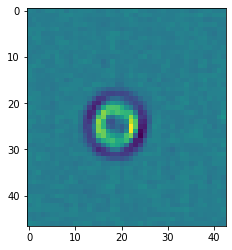

In [52]:
plt.imshow(m["pixels"][0])

# White tophat

In [51]:
from skimage.morphology import white_tophat, disk

In [52]:
bbox = m["bbox"]
bboxed = pixels[:, bbox[0]: bbox[2], bbox[1]:bbox[3]]

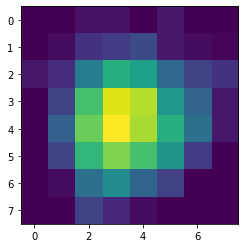

In [54]:
plt.imshow(white_tophat(bboxed[1], selem=disk(3)))

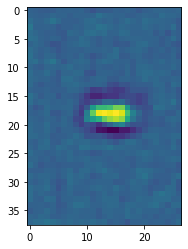

In [24]:
plt.imshow(pixels[0])